# Advanced Python Programming

Dr. Martin Wolf, Tomas Kontrimas

Advanced Python Programming, WS 2022/23

In [1]:
str('Hello advanced world!')

'Hello advanced world!'

## Why do we need to be able to develop software, in particular in physics?

* For most of our professional time we work with ...

    * data taking
    * data simulation
    * data management
    * data selection
    * data analysis
    
* All of the above needs software that is ...

    * efficient
    * modular
    * well maintainable
    * scalable

**Example: Trigger rate of the IceCube Neutrino Detector at South Pole:**

![Trigger rate of the Icecube Neutrino Detector at South Pole](figures/icecube_trigger_rate.png)

# Overview

* Learning objectives of this course
* Technical prerequisites of this Course
* Jupyter Notebooks & virtual Python environments
* The basics of Python
* Data types in Python
* Python as a calculator
* String formatting
* Loops and Conditions
* List comprehension
* Working with files
* Functions
* Lambda functions
* Exceptions
* Decorators
* Classes
* Properties
* Class methods
* Static methods
* PEP8 Coding Style
* Numpy
* Matplotlib

## Learning objectives of this course

* understanding of the concepts of object-oriented programming
* working with version-control systems like `git` and `github.com`
* basic understanding of an IceCube neutrino point-source search
* performing a neutrino point-source search with the `SkyLLH` likelihood software framework

## Technical Prerequisites Of This Course

* computer with Python and Jupyter support

    - Linux, Windows, Mac
    
* *github.com* account

## Jupyter Notebook and virtual Python environments

This shows the installation of Jupyter and Python virtual environments on Linux (Ubuntu).

First, let's install Jupyter via `apt-get`:

```bash
sudo apt-get install python3-notebook python3-ipykernel
```

For this course, I recommend to setup a dedicated virtual Python 3 environment:
    
```bash
sudo apt-get install virtualenvwrapper
source /usr/share/virtualenvwrapper/virtualenvwrapper.sh
```
  
The environment is created via:
  
```bash
mkvirtualenv -p /usr/bin/python3 --system-site-packages adv-py3-course
pip install -U astropy matplotlib numpy scipy
```

The final step is to add the virtual Python environment to Jupyter Notebook:

```bash
python -m ipykernel install --user \
    --name adv-py3-course --display-name "Python 3 (adv-py3-course)"
```

I further recommend to put the

```bash
source /usr/share/virtualenvwrapper/virtualenvwrapper.sh
```

line into your `.profile` and launch a new terminal window.

You can start a Jupyter Notebook via:

```bash
jupyter notebook
```

and create a new `py3-astro` notebook.

For executing Python scripts, you can activate the `py3-astro` environment via:

```bash
workon py3-astro
```

and deactivate it via:

```bash
deactivate
```

## The basics of Python

Python is an interpreted (no compilation) and loosely typed programming language.

In [1]:
%matplotlib notebook

In [2]:
# Comments start with '#'.

In [3]:
# Import modules.
import os

import matplotlib.pyplot
import numpy as np

In [4]:
# Import only specific functions from a module.
from __future__ import print_function, division

In [5]:
# Remember: never ever do 'from foo import *'

In [6]:
# Declare a variable.
a = 5.
a = "Hello World!"

## Data types

* Numeric types:  
  `int, float, complex`
* Sequence types:  
  `str, unicode, list, tuple, bytearray, buffer`
* Set types:  
  `set, frozenset`
* Map types:  
  `dict`
* Boolean types:
  `bool`
* The None type object: `None`
* Mutable data types like `list` and `dict` are copied by reference.
* Immutable data types like `int` and `float` are copied by value.
* Full list:  
  <https://docs.python.org/3.7/library/stdtypes.html#>

## Python as a calculator

In [7]:
# Addition and substraction
print("5.  + 5. =", 5. + 5.)
print("10. - 5. =", 10. - 5.)

5.  + 5. = 10.0
10. - 5. = 5.0


In [8]:
# Multiplication and division
print("5.  * 5. =", 5. * 5.)
print("25. / 5. =", 25. / 5.)

5.  * 5. = 25.0
25. / 5. = 5.0


In [9]:
# Modulo and exponentiation
print("25. % 4. =", 25. % 4.)
print("5.**2    =", 5.**2)

25. % 4. = 1.0
5.**2    = 25.0


In [10]:
# Do calculations with variables.
a = 5.
print("a + 5. =", a + 5.)

a + 5. = 10.0


In [11]:
b = 4.
c = a + b
print("c = a + b =", c)

c = a + b = 9.0


In [12]:
# In-place modifications
a += 5.
print("a =", a)

a = 10.0


In [13]:
# Call mathematical functions like sin, exp, log, ...
# Instead of NumPy, you can also use the 'math' module.
print("exp(2.5)   =", np.exp(2.5))
print("sin(pi/2.) =", np.sin(np.pi/2.))

exp(2.5)   = 12.1824939607
sin(pi/2.) = 1.0


## String formatting

General form:

```
[fill][align][sign][#][0][width][,][.precision][type]
```

See:  
<https://docs.python.org/2.7/library/string.html#formatspec>

In [14]:
# Some examples
print("{:>+10.2f}".format(np.pi))
print("{:010d}".format(3))

     +3.14
0000000003


In [15]:
# Some more examples
s = "{0}, {1[0]}, {1[1]}, {2[a]}"
print(s.format(0, [1, 2], {"a": 3}))
print("{key}".format(key=4))

0, 1, 2, 3
4


## Loops and Conditions

In [16]:
# Example for-loop with conditions
for i in range(3):
    if i == 0:
        print("Skip 0.")
    elif i % 2 > 0:
        print("{} is an odd  number.".format(i))
    else:
        print("{} is an even number.".format(i))

Skip 0.
1 is an odd  number.
2 is an even number.


In [17]:
# Example while-loop
d = {"a": 0, "b": 1}

while len(d) > 0:
    d.popitem()

* You can break out of a loop via `break`.
* Iterations can be skipped via `continue`.
* Remember that Python does not really know about scopes.

## List comprehension

An easy way to create iterables from existing ones.

In [18]:
# List comprehension examples
l = [i**2 for i in range(10)]
l = [10. / i for i in range(10) if i > 0]
l = [10. / i if i > 0 else np.inf for n in range(10)]
l = [[a*i for a in [1, 2]] for i in range(1, 11)]

In [19]:
# The same works for dictionaries.
d = {"a": 2., "b": 3.}
d = {k: v**2 for k, v in d.items()}

In [20]:
# And of course sets
s = {i**2 for i in range(10)}

In [21]:
# Some generator magic
g = (i**2 for i in range(10))
r = sum(g)

# We can also do this in one line.
print(sum(i**2 for i in range(10)))

285


## Working with files

In [22]:
# Create a text file and give it some input.
with open("example.txt", "w") as stream:
    stream.write("This is a line.\n")
    stream.write("This is another line.")

In [23]:
# Read the content of the text file.
with open("example.txt", "r") as stream:
    lines = stream.readlines()
    
print("".join(lines))

This is a line.
This is another line.


In [24]:
os.remove("example.txt")

## Functions

In [25]:
# A simple function that takes two arguments.
def power(a, e=2.):
    r"""Exponentiation
    
    Calculate: ``a**e``.
    
    Parameters
    ----------
    a : float
        Some number
    e : float, optional
        Exponent
        
    Returns
    -------
    float
        Result of ``a**e``
    
    """
    return a**e

In [26]:
print("5.**2 =", power(5.))

5.**2 = 25.0


In [27]:
# Alternative ways to call the function
results = [
    power(5., 2.),
    power(5., e=2.),
    power(a=5., e=2.),
    power(e=2., a=5.),
    power(*[5., 2.]),
    power(**{"a": 5., "e": 2.})
    ]

In [28]:
print("Results:", ", ".join("{}".format(r) for r in results))

Results: 25.0, 25.0, 25.0, 25.0, 25.0, 25.0


In [29]:
# General syntax
def func(*args, **kwargs):
    pass

A few words about doc strings:

* **Do write** them because they help to better understand your code.
* I reommend the NumPy style:  
  <https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html>

## Lambda functions

Lambdas are unnamed in-line functions.

In [30]:
# Example for lambda usage
print(sorted("String"))
print(sorted("String", key=lambda s: s.lower()))

['S', 'g', 'i', 'n', 'r', 't']
['g', 'i', 'n', 'r', 'S', 't']


In [31]:
# A lambda function can be assigned to a variable.
square = lambda x: x**2
print("5**2 =", square(5.))

5**2 = 25.0


## Exceptions

In [32]:
# Write a function that can raise an exception.
def devision(a, b):
    r"""Divide `a` by `b`.
    
    Parameters
    ----------
    a,b : float
        Nominator and denominator
        
    Returns
    -------
    float
        The result of ``a/b``
        
    Raises
    ------
    ValueError
        If the denominator `b` is zero.
    
    """
    if np.fabs(b) > 0.:
        return a / b
    else:
        raise ValueError("The denominator should not be zero.")

In [33]:
# Catch the exception.
try:
    r = devision(5., 0.)
except ValueError as e:
    print(e)
    r = np.inf
finally:
    print("The result is {}.".format(r))

The denominator should not be zero.
The result is inf.


A full list of built-in exceptions can be found here:  
<https://docs.python.org/2/library/exceptions.html>

## Decorators

Decorators are syntactic sugar for functions that are 'decorating' other functions.

In [34]:
# Example of a simple decorating function
def paragraph(f):
    return lambda name: "<p>{}</p>".format(f(name))

In [35]:
@paragraph
def greet(name):
    return "Hello {}, how are you?".format(name)

In [36]:
print(greet("John"))

<p>Hello John, how are you?</p>


## Classes

Python supports object-oriented programming.

In [37]:
# A simple class with two attributes
class Direction(object):
    r"""Direction
    
    Directional vector in spherical coordinates 
    
    Attributes
    ----------
    azimuth : float
        Azimuth angle in rad
    zenith : float
        Zenith angle in rad
    
    """
    def __init__(self, azimuth, zenith):
        self.azimuth = azimuth
        self.zenith = zenith
        
    def __str__(self):
        return "({d.azimuth}, {d.zenith})".format(d=self)

In [38]:
d = Direction(np.pi/3., np.pi/2.)
print("Direction:", d)

Direction: (1.0471975511965976, 1.5707963267948966)


## Properties

Properties allow for example to implement get/set methods for attributes.

In [39]:
class A(object):
    r"""A class with property
    
    """
    def __init__(self):
        self._a = 0
    
    @property
    def a(self):
        r"""int: A positive number
        """
        return self._a
    
    @a.setter
    def a(self, val):
        if val >= 0:
            self._a = val
        else:
            raise ValueError("Expect a positive number.")

## Class methods

Class methods allow for example to implement more than one constructor.

In [40]:
class A(object):
    r"""A class with class method
    
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __str__(self):
        return "a = {o.a}, b = {o.b}".format(o=self)
    
    @classmethod
    def from_tuple(cls, t):
        return cls(t[0], t[1])

In [41]:
a = A.from_tuple((1., 2.))
print(a)

a = 1.0, b = 2.0


## Static methods

In [42]:
class Angle(object):
    r"""A class with a static method
    
    """
    def __init__(self, value=0.):
        self.value = value
    
    @staticmethod
    def deg2rad(angle):
        return angle * np.pi / 180.

In [43]:
print("30deg = {:.2f}rad".format(Angle.deg2rad(30.)))

30deg = 0.52rad


In [44]:
a = Angle()
print("30deg = {:.2f}rad".format(a.deg2rad(30.)))

30deg = 0.52rad


## PEP8 Coding style

Please stick to the 'official' style guide for Python code:  
<https://www.python.org/dev/peps/pep-0008/>

## NumPy

From the [NumPy webpage](http://www.numpy.org/):

> NumPy is the fundamental package for scientific computing with Python.
> It contains among other things:
>
> * a powerful N-dimensional array object
> * sophisticated (broadcasting) functions
> * tools for integrating C/C++ and Fortran code
> * useful linear algebra, Fourier transform, and random number capabilities
>
> Besides its obvious scientific uses, NumPy can also be used as an efficient
> multi-dimensional container of generic data. Arbitrary data-types can be defined.
> This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

NumPy tutorial (pay special attention to the section about broadcasting rules):  
<https://docs.scipy.org/doc/numpy/user/quickstart.html>

## Matplotlib

From the [Matplotlib webpage](https://matplotlib.org/):

> Matplotlib is a Python 2D plotting library which produces publication quality figures
> in a variety of hardcopy formats and interactive environments across platforms.

In [45]:
# Call this magic function in the first line of your Jupyter notebook:
# %matplotlib notebook

In [46]:
# Change the plotting style.
# You can also define your own style sheets.
matplotlib.style.use(["seaborn-notebook", "seaborn-ticks"])

<IPython.core.display.Javascript object>


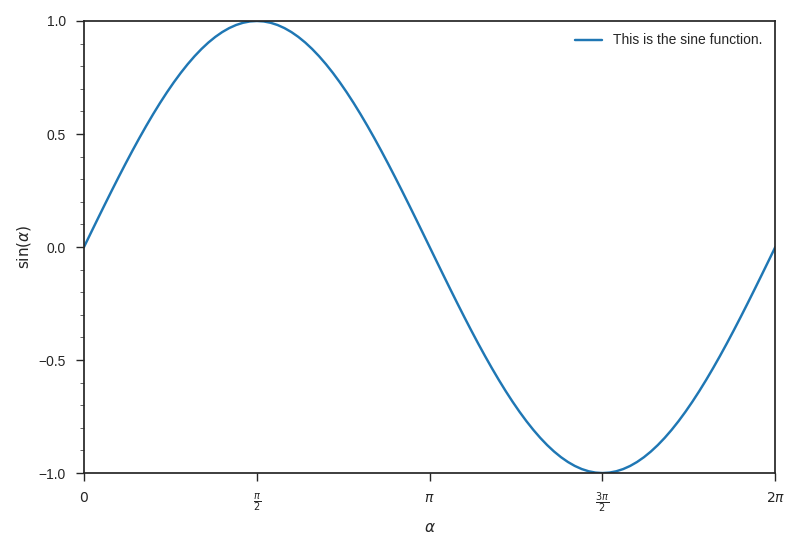

In [47]:
# Example: the final plot looks like this:
fig = matplotlib.pyplot.figure()

In [48]:
# Split the figure into an array of fields: ncols x nrows.
grid = matplotlib.pyplot.GridSpec(ncols=1, nrows=1)

In [49]:
# Add a subplot by specifying column and row.
# You can also use slicing here for combining fields.
ax = fig.add_subplot(grid[0, 0])

In [50]:
# Input data
xval = np.linspace(0., 2.*np.pi, 101)
yval = np.sin(xval)

In [51]:
# Plot the input data:
# Combine the data points with a solid line.
ax.plot(xval, yval, "-", label="This is the sine function.")

In [52]:
# Axes formatting
ax.set_xlim(xval[0], xval[-1])
ax.set_ylim(-1., 1.)

(-1.0, 1.0)

In [53]:
ax.xaxis.set_major_locator(matplotlib.ticker.LinearLocator(numticks=5))

In [54]:
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(
    ["$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]))

In [55]:
# For linear ticks, Matplotlib is pretty good in figuring out the location 
# of minor ticks.
ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(numticks=5))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

In [56]:
# Labels
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\sin(\alpha)$")

Text(0,0.5,'$\\sin(\\alpha)$')

In [57]:
# Legend
ax.legend(loc="upper right")

In [58]:
# Shrink the axes in order to fit in the labels.
grid.tight_layout(fig)

In [59]:
# Save the figure.
fig.savefig("example.pdf")

In [60]:
os.remove("example.pdf")